# Linear Regression - Exploring the relationship between advertising channels and sales

*What is the relationship between each advetising channel (TV, Radio, Newspaper) and sales?*

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("Advertising.csv")

In [ ]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


Exploring visually the relationship between each advertising channel and sales

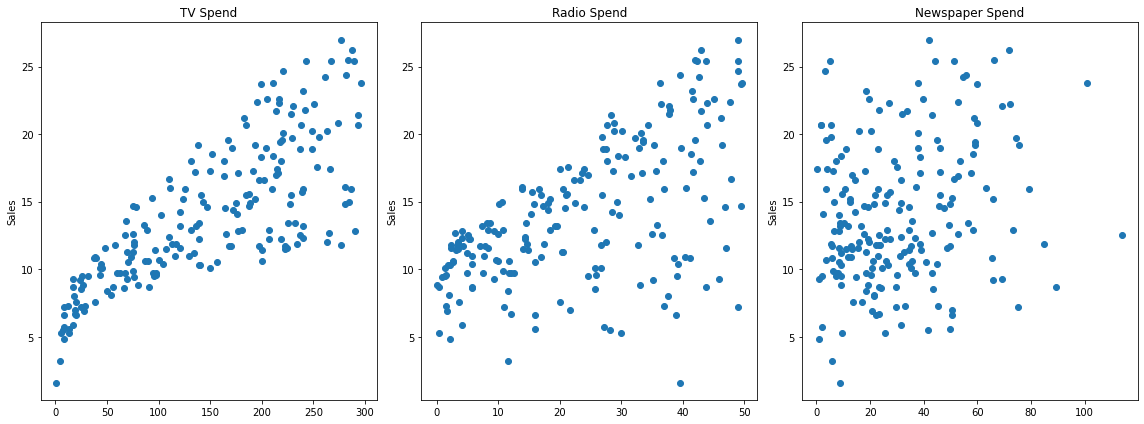

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,6))

axes[0].plot(df['TV'], df['sales'], 'o')
axes[0].set_ylabel('Sales')
axes[0].set_title('TV Spend')

axes[1].plot(df['radio'], df['sales'], 'o')
axes[1].set_ylabel('Sales')
axes[1].set_title('Radio Spend')

axes[2].plot(df['newspaper'], df['sales'], 'o')
axes[2].set_ylabel('Sales')
axes[2].set_title('Newspaper Spend')

plt.tight_layout();

Looks like TV spend and radio spend has a clearly a positive correlation with sales. For newspaper spend, though, it is less clear if that is a correlation.

## Separating the Training and Test set

Separating the features and the label

In [ ]:
X = df.drop('sales', axis=1)

In [ ]:
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [ ]:
y = df['sales']

In [ ]:
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

Separating the training and test set

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=101)

## Creating the Model (or Estimator)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

## Training the model

In [ ]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Making predicitions and Evaluating the model

In [ ]:
test_predictions = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

Taking a look in the mean and the distribution of the sales values. We are going to use that, to compare with the error.

In [ ]:
df['sales'].mean()

14.022500000000003

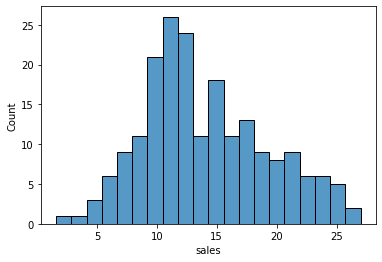

In [ ]:
sns.histplot(df, x='sales', bins=20)

*Mean Absolute Error*              

We can compare this with the mean value, so we can see that the error is about 10% of the mean value.

In [ ]:
mean_absolute_error(y_test, test_predictions)

1.213745773614481

*Mean Squared Error*

We can't compare this with the mean value, bacause it is squared. 

In [ ]:
mean_squared_error(y_test, test_predictions)

2.298716697886379

*Root Mean Squared Error*

We can compare this with the mean value, so we can see that the error is about 10% of the mean value. 
This value is okay and our model is dealing well with outliers.

In [ ]:
np.sqrt(mean_squared_error(y_test, test_predictions))

1.5161519375993882